# Check the figures

In [1]:
import sys
sys.path.append('../')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import make_df as mdf
import binning_eccen as binning
import numpy as np

In [4]:
avg_df = binning.get_all_subj_df(subjects_to_run=np.arange(1, 9), dv_to_group=["subj", "vroinames", "eccrois", "freq_lvl"])

In [5]:
avg_df.head()

,subj,vroinames,eccrois,freq_lvl,avg_betas,local_ori,local_sf
0,subj01,V1,1.0,0,1.404251,1.54996,3.049521
1,subj01,V1,1.0,1,1.352611,1.54996,5.467465
2,subj01,V1,1.0,2,1.147461,1.54996,10.411715
3,subj01,V1,1.0,3,0.998912,1.57303,19.268526
4,subj01,V1,1.0,4,0.911174,1.54996,36.179394


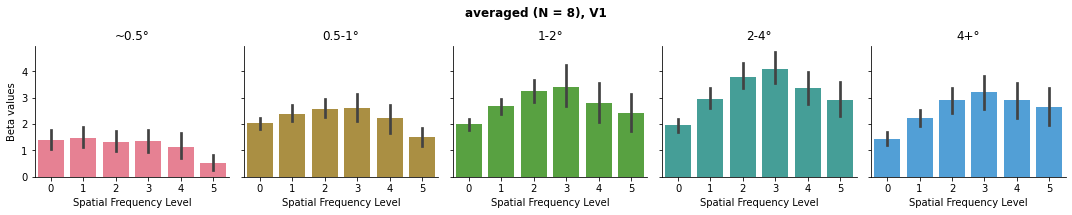

In [6]:
binning.barplot_2D(avg_df, save_fig=True)

Oops, something's wrong... My figure is not the same as Kendrick's.
I need to check
    1) if Kendrick's beta values are RR values. - yes
    2) the way I merge dataframes
    3)

Let's check subj01 and start checking from make_df.py.

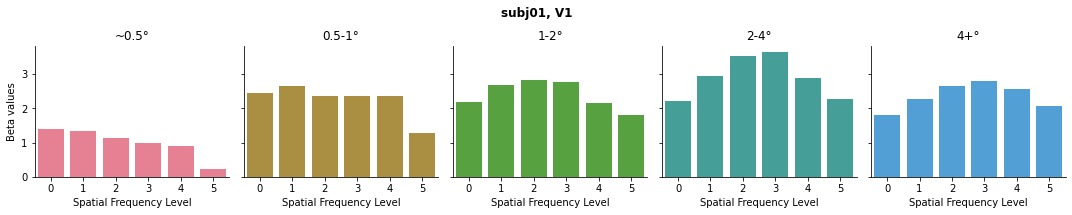

In [7]:
subj01_df = binning.get_all_subj_df(subjects_to_run=np.arange(1, 2), dv_to_group=["subj", "vroinames", "eccrois", "freq_lvl"])
binning.barplot_2D(subj01_df, save_fig=True)

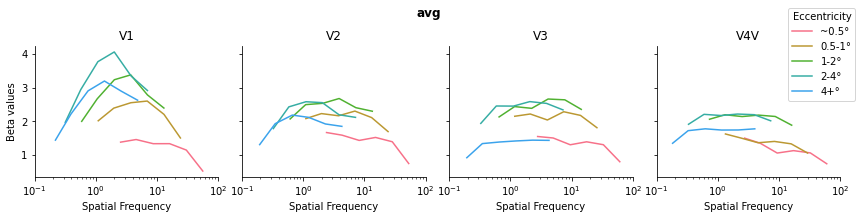

In [13]:
avg_subj_df = binning.get_all_subj_df(subjects_to_run=np.arange(1, 9), central_tendency=["mean"], dv_to_group=["vroinames", "eccrois", "freq_lvl"])
grid = binning.scatterplot_2D(mean_df=avg_subj_df, subj='avg', save_fig=True)

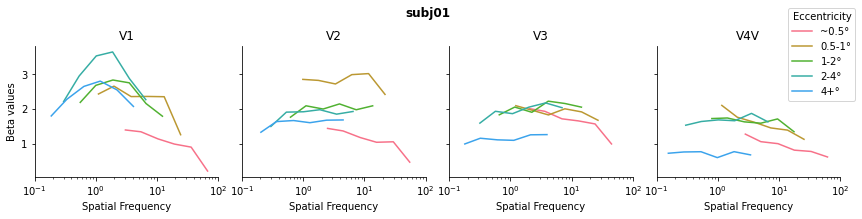

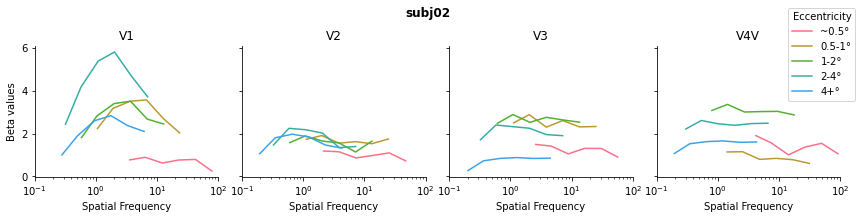

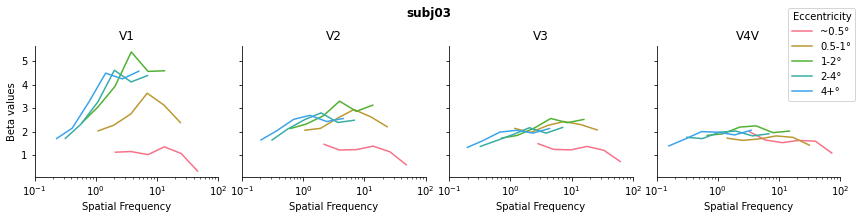

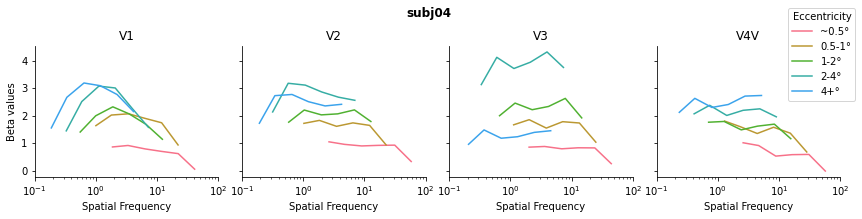

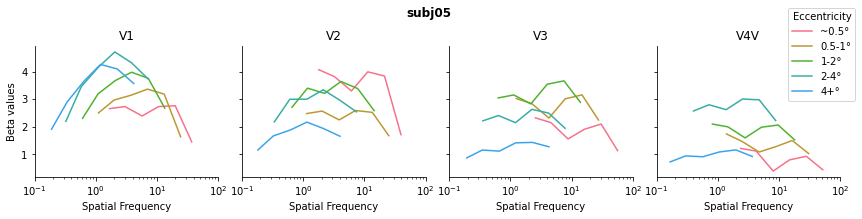

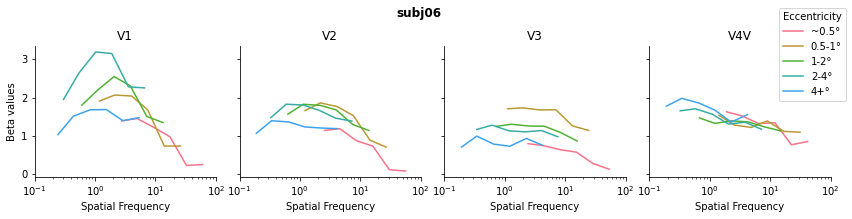

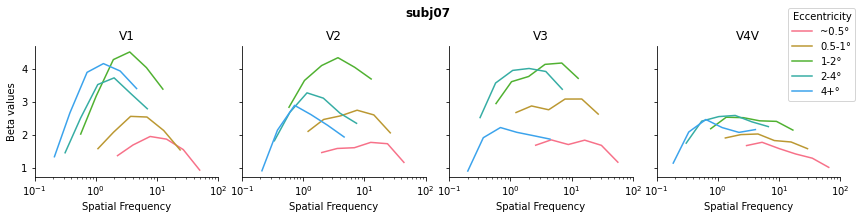

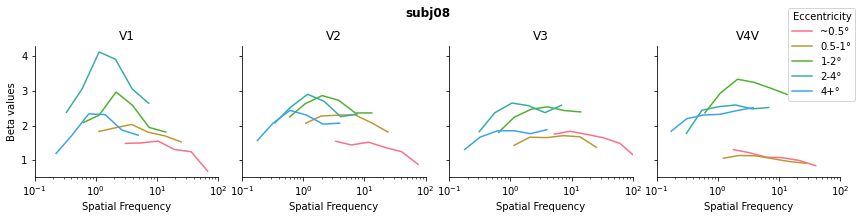

In [20]:
for sn in np.arange(1,9):
    subj = binning._sub_number_to_string(sn)
    cur_df = avg_df.query('subj==@subj')
    grid = binning.scatterplot_2D(mean_df=cur_df, subj=subj, save_fig=True)
    save_dir='/Users/jh7685/Dropbox/NYU/Projects/SF/MyResults_after_debug/'

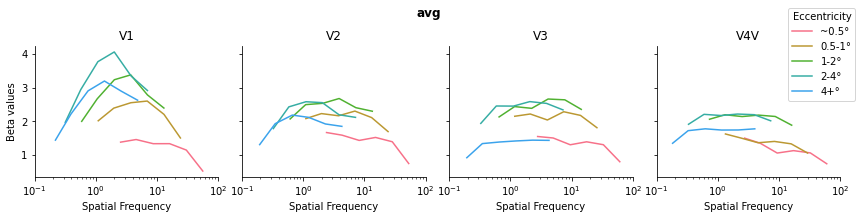

In [21]:
grid = binning.scatterplot_2D(mean_df=avg_subj_df, subj='avg', save_fig=True)

In [31]:
avg_df_meaned = avg_df.groupby(["subj", "eccrois", "freq_lvl", "vroinames"]).agg(["mean"]).reset_index()
avg_df_meaned.columns = avg_df_meaned.columns.get_level_values(0)


In [32]:
avg_df_meaned.head()

,subj,eccrois,freq_lvl,vroinames,avg_betas,local_ori,local_sf
0,subj01,1.0,0,V1,1.404251,1.549960,3.049521
1,subj01,1.0,0,V2,1.449542,1.572660,2.509674
2,subj01,1.0,0,V3,2.018517,1.583810,2.035846
3,subj01,1.0,0,V4v,1.285137,1.558873,2.820918
4,subj01,1.0,1,V1,1.352611,1.549960,5.467465


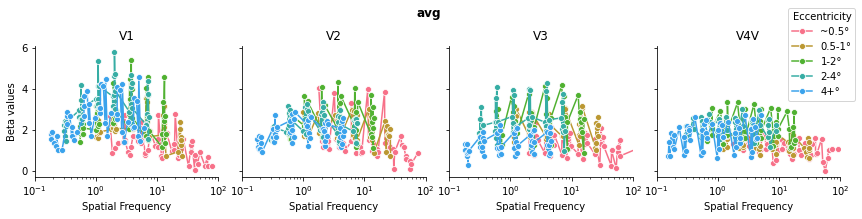

In [33]:
grid = binning.lineplot_2D(mean_df=avg_df_meaned, subj='avg', save_fig=False)

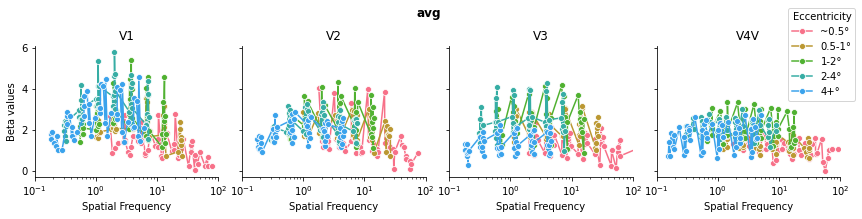

In [38]:
binning.lineplot_2D(mean_df=avg_df, subj='avg', estimator='mean')

<AxesSubplot:xlabel='local_sf', ylabel='avg_betas'>

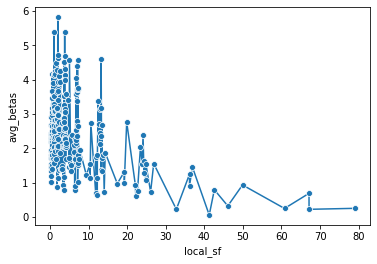

In [43]:
import seaborn as sns
sns.lineplot(x="local_sf", y="avg_betas", data=avg_df.query('vroinames == "V1"'), marker='o', estimator="mean")

In [40]:
avg_df.head()

,subj,vroinames,eccrois,freq_lvl,avg_betas,local_ori,local_sf
0,subj01,V1,1.0,0,1.404251,1.54996,3.049521
1,subj01,V1,1.0,1,1.352611,1.54996,5.467465
2,subj01,V1,1.0,2,1.147461,1.54996,10.411715
3,subj01,V1,1.0,3,0.998912,1.57303,19.268526
4,subj01,V1,1.0,4,0.911174,1.54996,36.179394


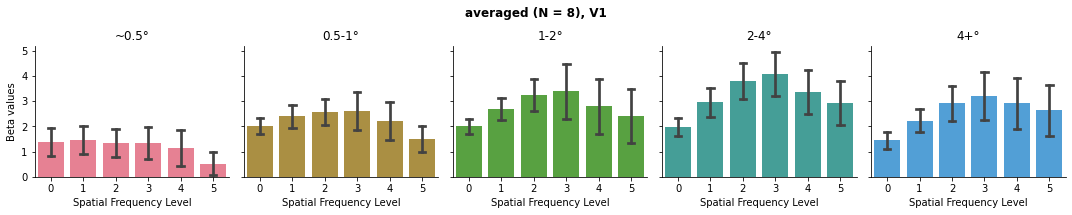

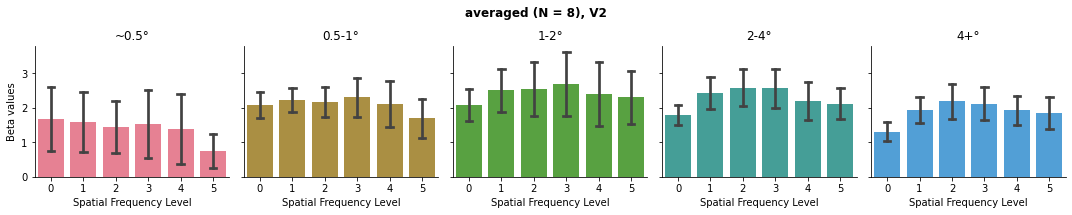

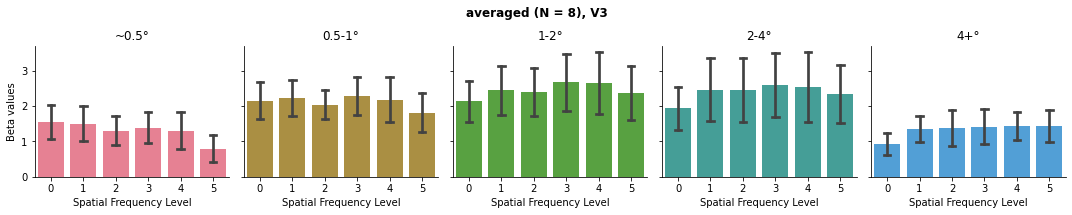

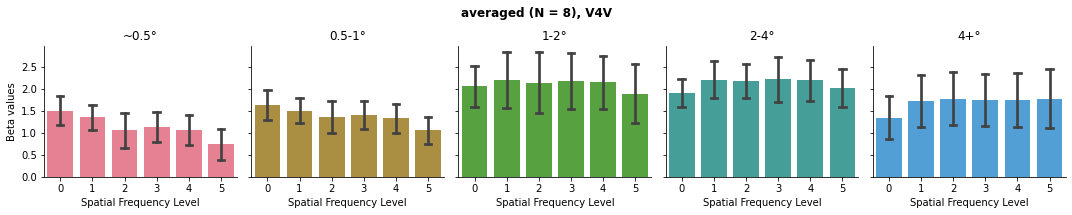

In [49]:
binning.barplot_2D(avg_df, vroi_list=["V1", "V2", "V3", "V4v"], save_file_name='avg_errbars.png',save_fig=True)